Import

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, t, ttest_ind, shapiro, ttest_rel, f_oneway, chi2_contingency
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

### 1) T-test

In [27]:
def ttest(data_1, data_2=None, null_value=0, alpha=0.05, mode='independent'):
    sample_size = len(data_1)
    if data_2 is not None:
        sample_size = min(sample_size, len(data_2))
    if data_2 is None:
        t_statistic, p_value = ttest_1samp(data_1, null_value)
        df = len(data_1) - 1
    elif mode == 'independent':
        t_statistic, p_value = ttest_ind(data_1, data_2)
        df = len(data_1) + len(data_2) - 1
    else:
        t_statistic, p_value = ttest_rel(data_1, data_2)
        df = len(data_1) - 1
    lower_critical = t.ppf(alpha/2, df)
    upper_critical = t.ppf(1 - alpha/2, df)
    print('min. group size: ', sample_size)
    print('t-statistic: ', t_statistic)
    print('lower critical value: ', lower_critical)
    print('upper critical value: ', upper_critical)
    print('p-value: ', p_value)
    print('alpha: ', alpha)
    if sample_size > 10:
        if p_value < alpha:
            print('Reject H0 (p-value < alpha)')
            return False
        print('Fail to reject H0 (p-value >= alpha)')
        return True
    if t_statistic < lower_critical or t_statistic > upper_critical:
        print('Reject H0 (t-statistic in rejection region)')
        if t_statistic > 0:
            print('The mean is higher')
        else:
            print('The mean is lower')
        return False
    print('Fail to reject H0 (t-statistic in acceptance region)')
    return True


Testing normality

Shapiro-Wilk test result for sample 1: ShapiroResult(statistic=0.9698132276535034, pvalue=0.5340773463249207)
Shapiro-Wilk test result for sample 2: ShapiroResult(statistic=0.9530121088027954, pvalue=0.20343534648418427)


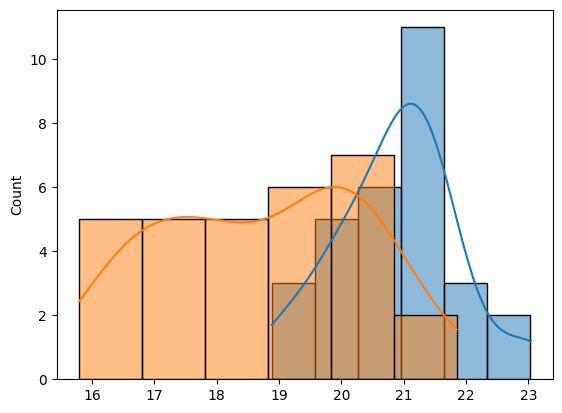

In [4]:
# create two independent samples
# sample1 = np.array([1, 2, 3, 4, 5])
# sample2 = np.array([6, 7, 8, 9, 10])

sample1 = np.random.normal(loc=21, scale=1, size=30)
sample2 = np.random.normal(loc=19, scale=1.5, size=30)

# check normality assumption
shapiro_test1 = shapiro(sample1)
shapiro_test2 = shapiro(sample2)

# visualize the data
sns.histplot(sample1, kde=True)
sns.histplot(sample2, kde=True)

# check normality on <= 50 observations per sample
print("Shapiro-Wilk test result for sample 1:", shapiro_test1)
print("Shapiro-Wilk test result for sample 2:", shapiro_test2)


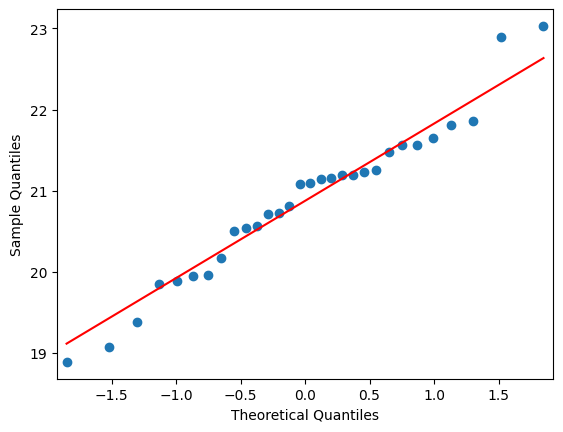

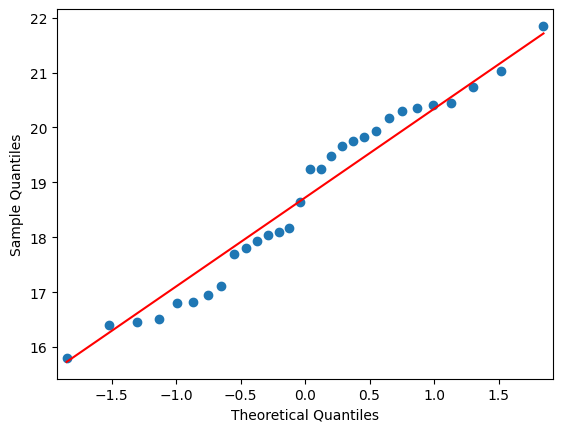

In [5]:
# Generate some example data
group1 = pd.DataFrame({
    'values': sample1
})

group2 = pd.DataFrame({
    'values': sample2
})

# Plot a Q-Q plot for group 1
qqplot(group1['values'], line='s')
plt.show()

# Plot a Q-Q plot for group 2
qqplot(group2['values'], line='s')
plt.show()

1.a) One sample

In [6]:
np.random.seed(123)

sample = np.random.normal(loc=21, scale=1, size=30)

null_value = 20

t_statistic, p_value = ttest_1samp(sample, null_value)

# print the results
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

t-statistic:  4.819854473685371
p-value:  4.184579745942899e-05


In [16]:
sample = np.random.normal(loc=21, scale=1, size=11)
res = ttest(sample, null_value=20.99, alpha=0.05)

min. group size:  11
t-statistic:  -0.7838842991036171
lower critical value:  -2.2281388519649385
upper critical value:  2.2281388519649385
p-value:  0.4512757644081947
alpha:  0.05
Fail to reject H0 (p-value >= alpha)


1.b) Independent two samples

In [8]:
# create two independent samples
sample1 = np.array([1, 2, 3, 4, 5])
sample2 = np.array([6, 7, 8, 9, 10])

# perform t-test
t_statistic, p_value = ttest_ind(sample1, sample2)

# print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: -5.0
p-value: 0.001052825793366539


In [22]:
sample_1 = np.random.normal(loc=20, scale=1, size=30)
sample_2 = np.random.normal(loc=19, scale=2, size=30)
res = ttest(data_1=sample_1, data_2=sample_2, alpha=0.05)

min. group size:  30
t-statistic:  1.6977373479464941
lower critical value:  -2.0009953770482105
upper critical value:  2.00099537704821
p-value:  0.09491728892716275
alpha:  0.05
Fail to reject H0 (p-value >= alpha)


1.c) Paired two samples

In [24]:
# create two related samples
before = np.array([10, 12, 11, 13, 14])
after = np.array([11, 13, 11, 15, 15])

# calculate the difference between the samples
diff = after - before

# perform the paired t-test
t_statistic, p_value = ttest_rel(after, before)

# print the results
print("Paired t-test results:")
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

Paired t-test results:
t-statistic:  3.162277660168379
p-value:  0.034109423167409635


In [31]:
sample_1 = np.random.normal(loc=19.99, scale=1, size=30)
sample_2 = np.random.normal(loc=19, scale=2, size=30)
res = ttest(data_1=sample_1, data_2=sample_2, alpha=0.05, mode='paired')

hi
min. group size:  30
t-statistic:  2.438139186485338
lower critical value:  -2.0452296421327034
upper critical value:  2.045229642132703
p-value:  0.021123883336727742
alpha:  0.05
Reject H0 (p-value < alpha)


### 2) ANOVA

2.a) One-way

In [2]:
# Create three samples with different means
sample1 = np.array([1, 2, 3, 4, 5])
sample2 = np.array([6, 7, 8, 9, 10])
sample3 = np.array([11, 12, 13, 14, 15])

# Perform the one-way ANOVA test
f_statistic, p_value = f_oneway(sample1, sample2, sample3)

# Print the results
print("One-way ANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)


One-way ANOVA results:
F-statistic: 50.0
p-value: 1.5127924217375409e-06


2.b) Two-way

### 3) Chi-square

In [4]:
# create a contingency table
obs = [[10, 20, 30], [6, 9, 17], [15, 10, 15]]

# perform chi-squared independence test
chi2_stat, p_value, dof, expected = chi2_contingency(obs)

# print results
print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi-squared statistic: 6.570771298593879
P-value: 0.16038548158412727
Degrees of freedom: 4
Expected frequencies:
[[14.09090909 17.72727273 28.18181818]
 [ 7.51515152  9.45454545 15.03030303]
 [ 9.39393939 11.81818182 18.78787879]]


### 4) Non-parametric

In [9]:
a = 15000/0.7/5/1.1
a

3896.103896103896

In [10]:
a*12

46753.246753246756